# Early Classification of Diabetes using XGBoost and Random Forest Classification

Description:
This project focuses on the early classification of diabetes using two popular machine learning algorithms: XGBoost and Random Forest Classification.

Key Features:

* ML models trained with and without utilizing the SMOTE technique to address class imbalance.

* Evaluation of model accuracies through confusion matrix and k-Fold cross-validation.

* Comparison of accuracies between different models.
Details:


In this project, we aim to develop accurate models for the early classification of diabetes by leveraging the power of XGBoost and Random Forest Classification algorithms. Class imbalance is a common challenge in diabetes datasets, and to tackle this issue, we explore the effectiveness of training models with and without utilizing the SMOTE (Synthetic Minority Over-sampling Technique) method.

To assess the performance of the trained models, we employ the widely-used confusion matrix. This evaluation metric provides valuable insights into the accuracy of the classification by analyzing true positive, true negative, false positive, and false negative predictions.

Furthermore, we utilize k-Fold cross-validation, a robust technique for estimating the model's generalization performance. By dividing the dataset into k subsets (folds), we train and validate the models k times, with different subsets serving as the validation data in each iteration. This approach provides a more reliable estimate of the model's accuracy and helps mitigate the risks of overfitting or underfitting.

The project culminates in a thorough comparison of the accuracies achieved by the models trained with and without SMOTE. By analyzing the performance of both approaches, we can determine the impact of oversampling the minority class on the model's predictive capability and identify the most accurate and reliable model for diabetes classification.

Through this project, we aim to contribute valuable insights into the early classification of diabetes, leveraging the strengths of XGBoost and Random Forest Classification. The findings will enhance our understanding of the effectiveness of these algorithms, emphasize the significance of employing SMOTE for class imbalance, and aid in the selection of the most accurate model for early diabetes classification.






**Importing the Libraries**

In [ ]:
!pip install scikit-learn==1.2.2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

**Importing the Dataset**

In [ ]:
dataset=pd.read_csv('diabetes_data.csv',sep=";") #the values in the csvs file are seperated by ';'
dataset.head()


,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


# Without SMOTE

**Dataset Report**

In [ ]:
#!pip install pandas-profiling[notebook]
from pandas_profiling import ProfileReport
prof_report = ProfileReport(dataset)
prof_report

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Data Preprocessing**

In [ ]:
dataset["gender"] = dataset["gender"].apply({"Male":1, "Female":0}.get) #Since the gender columns have 2 genders, we can directly apply this statement to save runtime and encode the data
dataset.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
print(X)
print(y)

     age  gender  polyuria  polydipsia  sudden_weight_loss  weakness  \
0     40       1         0           1                   0         1   
1     58       1         0           0                   0         1   
2     41       1         1           0                   0         1   
3     45       1         0           0                   1         1   
4     60       1         1           1                   1         1   
..   ...     ...       ...         ...                 ...       ...   
515   39       0         1           1                   1         0   
516   48       0         1           1                   1         1   
517   58       0         1           1                   1         1   
518   32       0         0           0                   0         1   
519   42       1         0           0                   0         0   

     polyphagia  genital_thrush  visual_blurring  itching  irritability  \
0             0               0                0        1   

**Exploring the data**

Checking for dataset balance:

If a dataset is unbalanced, it means that the number of instances belonging to one class significantly outweighs the number of instances belonging to another class.


**Plotting a Bar Graph to analyse the readings**

In [ ]:
count=0 #initializing the count with 0
for i in range(len(y)): # for loop to count number of diabetic readings
  if(y[i]==1):
    count=count+1
print("The data distribution in the given dataset: \n \nDiabetic:", (count/(len(y)))*100,"%")
print("Non-Diabetic:", ((len(y)-count)/(len(y))*100),"%") # non-diabetic = total_readings - diabetic_readings

The data distribution in the given dataset: 
 
Diabetic: 61.53846153846154 %
Non-Diabetic: 38.46153846153847 %


**Distribution of dataset**

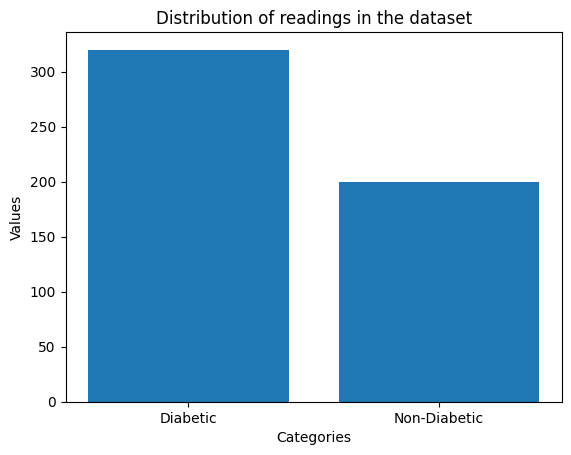

In [ ]:
categories = ['Diabetic', 'Non-Diabetic']
values = [count, len(y)-count]

plt.bar(categories, values)

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Distribution of readings in the dataset')

plt.show()

**Age and diabeties symptoms count**

<Axes: xlabel='age', ylabel='Count'>

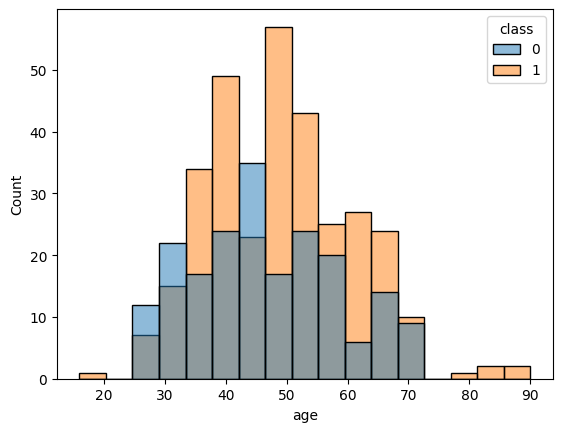

In [ ]:
import seaborn as sns
sns.histplot(x='age', data = dataset, hue='class') # Here class 0 denotes the number of non-diabetic people

Splitting the dataset into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_tr1=X_train #for random forest classification without SMOTE
X_t1=X_test #for random forest classification without SMOTE
y_tr1=y_train #for random forest classification without SMOTE
y_t1=y_test #for random forest classification without SMOTE

**Training the XGBoost on the training set Without using SMOTE in dataset**

In [ ]:
from xgboost import XGBClassifier
classif=XGBClassifier()
classif.fit(X_train.values,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

**Predicting and making confusion matrix for XGBoost without SMOTE**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classif.predict(X_test)
confm=confusion_matrix(y_test,y_pred)
print(confm)
accuracy_score(y_test,y_pred)

[[40  0]
 [ 1 63]]


0.9903846153846154

**Applying k-Fold cross validation on XGBoost model without SMOTE**

In [ ]:
from sklearn.model_selection import cross_val_score
accur=cross_val_score(estimator=classif, X = X_train, y = y_train, cv=10)
avg=accur.mean()*100
sd=accur.std()*100
print("The Mean accuracy: {:.2f} %".format(avg))
print("Standard Deviation: {:.2f} %".format(sd))

The Mean accuracy: 96.89 %
Standard Deviation: 3.21 %


**Training Random Forest Classification without SMOTE**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
cf = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0) #experiment for criterion
cf.fit(X_tr1.values,y_tr1)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

**Training the RandomForestClassification Model on the training set  making confusion matrix Without using SMOTE in dataset**

In [ ]:
y_pred1 = cf.predict(X_t1)
confm1=confusion_matrix(y_t1,y_pred1)
print(confm1)
accuracy_score(y_t1,y_pred1)

[[40  0]
 [ 1 63]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.9903846153846154

**Applying k-Fold cross validation on RandomForestClassification model without SMOTE**

In [ ]:
from sklearn.model_selection import cross_val_score
accur1=cross_val_score(estimator=cf, X = X_tr1, y = y_tr1, cv=10)
avg1=accur1.mean()*100
sd1=accur1.std()*100
print("The Mean accuracy: {:.2f} %".format(avg1))
print("Standard Deviation: {:.2f} %".format(sd1))

The Mean accuracy: 97.61 %
Standard Deviation: 2.39 %


#With SMOTE

**Applying SMOTE**

Important Note:

*   The dataset is first divided into training set and test set.
*   SMOTE is applied to training data only, while unsmoted test data is used to evaluate model accuracy on real-world scenarios, ensuring generalization beyond artificially generated data.


In [ ]:
from imblearn.over_sampling import SMOTE
print("Original Data: \n")
print(X)
print(y,"\n")
X_train_bs,X_test_bs,y_train_bs,y_test_bs= train_test_split(X,y,test_size=0.2,random_state=0) #bs stands for "before smote"
print("Training Data:\n")
print(X_train)
print(y_train,"\n")
smote=SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_bs, y_train_bs) #split the dataset first then apply smote on training data only
print("Smoted training data:\n")
print(X_resampled)
print(y_resampled)

Original Data: 

     age  gender  polyuria  polydipsia  sudden_weight_loss  weakness  \
0     40       1         0           1                   0         1   
1     58       1         0           0                   0         1   
2     41       1         1           0                   0         1   
3     45       1         0           0                   1         1   
4     60       1         1           1                   1         1   
..   ...     ...       ...         ...                 ...       ...   
515   39       0         1           1                   1         0   
516   48       0         1           1                   1         1   
517   58       0         1           1                   1         1   
518   32       0         0           0                   0         1   
519   42       1         0           0                   0         0   

     polyphagia  genital_thrush  visual_blurring  itching  irritability  \
0             0               0            

**Exploring the new SMOTED data**

In [ ]:
count1=0 #initializing the count with 0
for k in range(len(y_resampled)): # for loop to count number of diabetic readings
  if(y_resampled[k]==1):
    count1=count1+1
print("The data distribution in the given dataset: \n \nDiabetic:", (count1/(len(y_resampled)))*100,"%")
print("Non-Diabetic:", ((len(y_resampled)-count1)/(len(y_resampled))*100),"%") # non-diabetic = total_readings - diabetic_readings

The data distribution in the given dataset: 
 
Diabetic: 50.0 %
Non-Diabetic: 50.0 %


**Distribution of dataset**

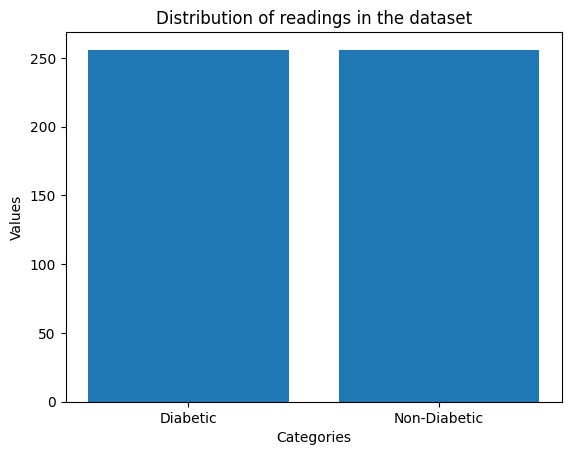

In [ ]:
categories1 = ['Diabetic', 'Non-Diabetic']
values1 = [count1, len(y_resampled)-count1]

plt.bar(categories1, values1)

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Distribution of readings in the dataset')

plt.show()

**Re-Joining to make a smoted database**

In [ ]:
dataset1 = pd.concat([X_resampled, y_resampled], axis=1) #smote applied only on training data
dataset1

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,47,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
2,66,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1
3,47,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,65,0,1,1,0,1,1,0,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
508,60,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
509,44,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
510,53,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0


**Dataset report**

In [ ]:
prof_report_s = ProfileReport(dataset1)
prof_report_s

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Age and diabeties symptoms count**

<Axes: xlabel='age', ylabel='Count'>

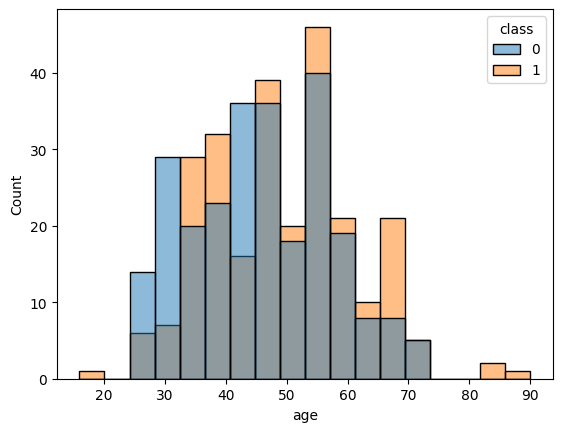

In [ ]:
sns.histplot(x='age', data = dataset1, hue='class') # Here class 0 denotes the number of non-diabetic people

Separating the variables for random forest classification

In [ ]:
X_train_s,X_test_s,y_train_s,y_test_s= train_test_split(X_resampled,y_resampled,test_size=0.01,random_state=0) #alomst no test data allocation after applying smote on training set because we will apply test the model on original data
X_tr1_s=X_train_s #for random forest classification with SMOTE
X_t1_s=X_test #for random forest classification with SMOTE but we will test the model with origional data for better pridictions
y_tr1_s=y_train_s #for random forest classification with SMOTE
y_t1_s=y_test #for random forest classification with SMOTE but we will test the model with original data for better pridictions

**Training the XGBoost on the training set using SMOTE in dataset**

In [ ]:
classif.fit(X_train_s.values,y_train_s)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

**Predicting and making confusion matrix for XGBoost using SMOTE**

In [ ]:
y_pred_s = classif.predict(X_test)
confm_s=confusion_matrix(y_test,y_pred_s) #checking with original data
print(confm_s)
accuracy_score(y_test,y_pred_s)

[[40  0]
 [ 1 63]]


0.9903846153846154

**Applying k-Fold cross validation on XGBoost model with SMOTE**

In [ ]:
accur_s=cross_val_score(estimator=classif, X = X_train_s, y = y_train_s, cv=10)
avg_s=accur_s.mean()*100
sd_s=accur_s.std()*100
print("The Mean accuracy: {:.2f} %".format(avg_s))
print("Standard Deviation: {:.2f} %".format(sd_s))

The Mean accuracy: 96.84 %
Standard Deviation: 2.69 %


**Training Random Forest Classification with SMOTE**


In [ ]:
cf.fit(X_tr1_s.values,y_tr1_s)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

**Training the RandomForestClassification Model on the training set  making confusion matrix using SMOTE in dataset**

In [ ]:
y_pred1_s = cf.predict(X_t1_s)
confm1_s=confusion_matrix(y_t1_s,y_pred1_s)
print(confm1_s)
accuracy_score(y_t1_s,y_pred1_s)

[[39  1]
 [ 0 64]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.9903846153846154

**Applying k-Fold cross validation on RandomForestClassification model with SMOTE**

In [ ]:
accur1_s=cross_val_score(estimator=cf, X = X_tr1_s, y = y_tr1_s, cv=10)
avg1_s=accur1_s.mean()*100
sd1_s=accur1_s.std()*100
print("The Mean accuracy: {:.2f} %".format(avg1_s))
print("Standard Deviation: {:.2f} %".format(sd1_s))

The Mean accuracy: 97.43 %
Standard Deviation: 2.18 %


**Results**

In [ ]:
print("The average from XGBoost (without SMOTE): {:.2f} % ".format (avg))
print("The standard deviation from XGBoost (without SMOTE): {:.2f} % ".format(sd))
print("\n")
print("The average from Random Forest Classification (without SMOTE): {:.2f} % ".format(avg1))
print("The standard deviation from Random Forest Classification (without SMOTE):{:.2f} % ".format(sd1))
print("\n")
print("The average from XGBoost (with SMOTE): {:.2f} % ".format(avg_s))
print("The standard deviation from XGBoost (with SMOTE): {:.2f} % ".format(sd_s))
print("\n")
print("The average from Random Forest Classification (with SMOTE): {:.2f} % ".format(avg1_s))
print("The standard deviation from Random Forest Classification (with SMOTE): {:.2f} % ".format(sd1_s))

The average from XGBoost (without SMOTE): 96.89 % 
The standard deviation from XGBoost (without SMOTE): 3.21 % 


The average from Random Forest Classification (without SMOTE): 97.61 % 
The standard deviation from Random Forest Classification (without SMOTE):2.39 % 


The average from XGBoost (with SMOTE): 96.84 % 
The standard deviation from XGBoost (with SMOTE): 2.69 % 


The average from Random Forest Classification (with SMOTE): 97.43 % 
The standard deviation from Random Forest Classification (with SMOTE): 2.18 % 


**Conclusion**

Comparing the results between XGBoost and Random Forest Classification, both with and without SMOTE, we can make the following observations:

1.   Without SMOTE:

*   XGBoost achieves an average accuracy of 96.89% with a standard deviation of 3.21%.
*   Random Forest Classification achieves a higher average accuracy of 97.61% with a lower standard deviation of 2.39%.

Based on these results, Random Forest Classification without SMOTE has a higher average accuracy and a lower standard deviation compared to XGBoost without SMOTE.

2.   With SMOTE

*   XGBoost achieves an average accuracy of 96.84% with a standard deviation of 2.18%.
*   Random Forest Classification achieves a slightly lower average accuracy of 97.43% with the same standard deviation of 2.18% as XGBoost.

In this case, Random Forest Classification with SMOTE has a slightly higher average accuracy than XGBoost with SMOTE, but the standard deviation remains the same.

Considering both the average accuracy and standard deviation, **Random Forest Classification without SMOTE has the highest average accuracy and XGBoost with SMOTE has the lowest standard deviation. However, the difference in average accuracy between the models is relatively small.**

Ultimately, the choice between XGBoost and Random Forest Classification depends on various factors, including the specific problem, dataset characteristics, and the importance of accuracy versus consistency.


**Creating a .pkl File**

In [ ]:
import pickle
# Assuming cf.predict is a function or object you want to pickle
cf_predict = cf.predict  # Replace cf.predict with the actual object you want to pickle

# Open the file in binary write mode
with open("Diabetes.pkl", "wb") as pickle_out:
    pickle.dump(cf_predict, pickle_out)


In [ ]:
print(cf.predict([[21,0,0,1,1,1,0,0,1,1,0,1,0,0,1,1]]))

array([1])